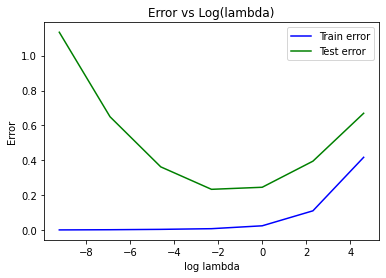

In [1]:
# Problem 4 
# Name: Karthick Subramanian
# ASUID: 1223408524

import numpy as np
from matplotlib import pyplot as plt
import math

#Used a function to calculate the error
def Error_func(Lambda,X,Y,d):
  X_Trans = np.transpose(X)
  I = np.identity(d)
  w = []
  error = []
  for i in range(len(Lambda)):
    Inv = np.linalg.solve(np.dot(X_Trans,X) + Lambda[i]*I, I)
    X_t_y = np.dot(X_Trans,Y)
    w_cap = np.dot(Inv,X_t_y)
    error.append(np.linalg.norm(np.dot(X,w_cap) - Y) / np.linalg.norm(Y))
    w.append(w_cap)
  return error,w
   
#Initialize the require variables   
Train_error = []
Test_error = []
Lambda = np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 100])


for i in range(30):
  train_n = 100
  test_n = 1000
  d = 100
  tes_error = []

  #Generate random vaiables for train and test
  X_train = np.random.normal(0,1, size=(train_n,d))
  a_true = np.random.normal(0,1, size=(d,1))
  y_train = X_train.dot(a_true) + np.random.normal(0,0.5,size=(train_n,1))
  X_test = np.random.normal(0,1, size=(test_n,d))
  y_test = X_test.dot(a_true) + np.random.normal(0,0.5,size=(test_n,1))
  
  #Calculate train error
  error,w = Error_func(Lambda,X_train,y_train,d)    
  Train_error.append(error)

  #Calculate Test error
  for i in range(len(Lambda)):
    tes_error.append(np.linalg.norm(np.dot(X_test,w[i]) - y_test) / np.linalg.norm(y_test))

  Test_error.append(tes_error)

#Find the mean of train and test errors  
Train_error = np.mean(Train_error,0)
Test_error = np.mean(Test_error,0)
for i in range(len(Lambda)):
  Lambda[i] = math.log(Lambda[i])

#Plot the graph
plt.plot(Lambda, Train_error, label = 'Train error', color = 'blue')
plt.plot(Lambda, Test_error, label = 'Test error', color ='green')
plt.xlabel("log lambda")
plt.ylabel("Error")
plt.legend()
plt.title("Error vs Log(lambda)")
plt.show()


  